# Austin Animal Center Exploration: Findings

### by Antonio Vargas

## Outline

* Investigation Overview
* Dataset Overview
* Methodology Overview
* Findings Overview
* Entire Population Exploration
 * Covariance with stay-length
* Dog Population Exploration
 * Covariance with stay-length
 * Plots of Significant Variables
* Dog-Adoption Population Exploration
 * Covariance with stay-length
 * Plots of Significant Variables
* Cat Population Exploration
 * Covariance with stay-length
 * Plots of Significant Variables
* Cat-Adoption Population Exploration
 * Covariance with stay-length
 * Plots of Significant Variables
* Recap

## Investigation Overview

Joined public intake and outcomes to generate intake stay-lengths. The stay-lengths were the variable of interest, given business value of predicting stay-lengths for intakes. 

## Dataset Overview

The intake and outcomes tables are public tables provided by the city of Austin. Both tables contained an animal ID, and thus was able to generate a “stay-ID” for each row, which is the concatenation of the animal-ID and the index-number of that particular animal’s visit. I could then join the tables by the stay-ID, and generate the length of stay by generating the timespan between the intake and outcome timestamps

## Methodology Overview

All categorical variables were converted to binary variables, and then the covariance across all variables for the population-of-interest was evaluated. Variables and categories yielding a significant correlation value were then explored visually and then assessed as yielding a significant relationship.

## Findings Overview

Across the entire population, the type of animal (dog, cat, wildlife, livestock, etc...) and the intake-type (adoption, euthanasia request, etc...) revealed major correlations with the stay-lengths. Thus, I also explored correlation amongst subpopulations dogs, dog-adoptions, cats, and cat-adoptions. 

Across the subpopulations, the exploration didn’t yield a single strong correlation or inverse correlation, yet a number of significant correlations were found across the population and subpopulations, thus indicating that it would be possible a build a multivariate predictive model that could potentially predict the stay-length of a new dog or cat intake.

In [1]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

# load dataset from csv
stays_df = pd.read_csv('austin-animal-center_stays_in_the_center.csv')

In [3]:
# converting string date columns to datetime columns
exploration_df = stays_df.copy()

In [4]:
exploration_df['intake_age_calc'] = pd.to_timedelta(stays_df['intake_age_calc'])
exploration_df['outcome_age_calc'] = pd.to_timedelta(stays_df['outcome_age_calc'])
exploration_df['stay_length'] = pd.to_timedelta(stays_df['stay_length'])

In [5]:
# creating float columns for age variables to allow for covariance computation

exploration_df['intake_age_days'] = exploration_df['intake_age_calc'].dt.total_seconds()/(60*60*24)
exploration_df['outcome_age_days'] = exploration_df['outcome_age_calc'].dt.total_seconds()/(60*60*24)
exploration_df['stay_length_days'] = exploration_df['stay_length'].dt.total_seconds()/(60*60*24)

In [6]:
# creating column for log for stay-length to find significant covariance
exploration_df['stay_length_days_log'] = np.log(exploration_df.stay_length_days + 0.001)

In [7]:
# creating dummies and joining to dataframe for covariance analysis
dummy_columns = ['animal_type', 'gender', 'gonadectomy', 'intake_condition', 'intake_type', 'outcome_subtype', 'outcome_type']
dummy_table = pd.get_dummies(exploration_df[dummy_columns])
exploration_df = exploration_df.join(dummy_table)

## Whole Population

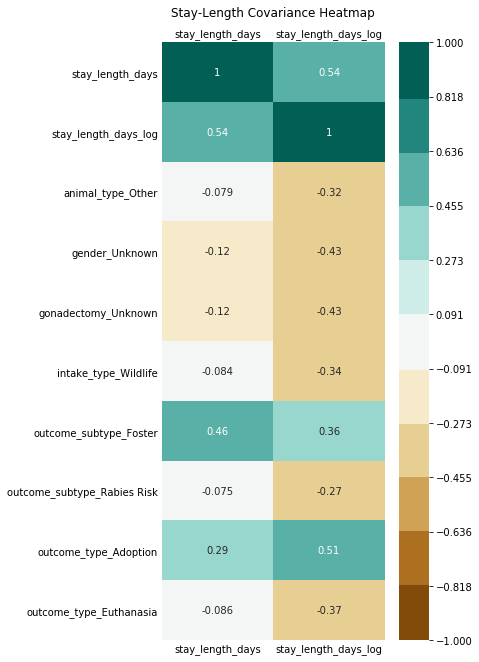

In [8]:
# stay-length covariance 
corr_table = exploration_df.corr()
significant_corr_table = corr_table.query('(abs(stay_length_days) > (3/11)) | (abs(stay_length_days_log) > (3/11))')

plt.pyplot.figure(figsize = (5, 11))
plt.pyplot.title('Stay-Length Covariance Heatmap', verticalalignment = 'top', position = (0.5, 1.05))
ax = sns.heatmap(significant_corr_table[['stay_length_days','stay_length_days_log']], vmin = -1, center = 0, vmax = 1, annot=True, 
                 cmap = sns.color_palette("BrBG", 11), cbar_kws=dict(ticks=np.arange(-1,1.00001,2/11)))
ax.tick_params(axis = 'x', labeltop = True)
ax.tick_params(length = 0)

The entire population yielded strongly significant correlations (I define that here as an absolute coefficient value greater than 3/11) with the gender, gonadectomy, intake-type, outcome-type, and outcome-subtype categories. 

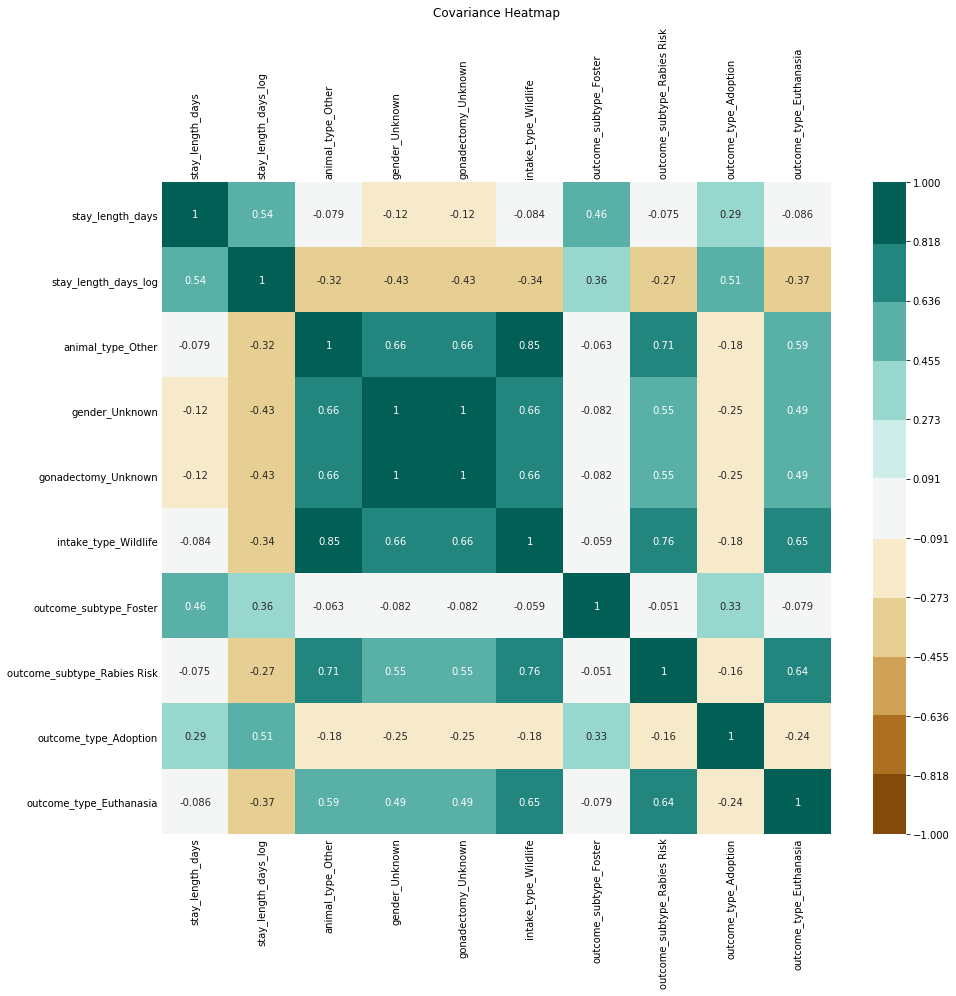

In [9]:
plt.pyplot.figure(figsize = (15,12))
plt.pyplot.title('Covariance Heatmap', verticalalignment = 'top', position = (0.5, 1.26))
ax = sns.heatmap(significant_corr_table.loc[:,significant_corr_table.index], vmin = -1, center = 0, vmax = 1, annot=True, cmap = sns.color_palette("BrBG", 11),
                cbar_kws=dict(ticks=np.arange(-1,1.001,2/11)))
ax.tick_params(length = 0)
ax.tick_params(axis = 'x', labeltop = True, labelrotation = 90)

When reviewing the covariance amongst the stay-length correlates, the wildlife-intakes do seem to be interdependent with the other variables. 

Note that `intake_type_Wildlife` has a correlation coefficient greater than 0.65 for correlations with `animal_type_Other`, `gender_Unknown`, `gonadectomy_Unknown`, `outcome_subtype_Rabies Risk`, and `outcome_type_Euthanasia`. 

Also, note that `outcome_type_Adoption` holds the strongest correlation with stay-lengths. 

The results from the covariance table indicate that non-wildlife animals, e.g. cats and dogs, as well as adoptions should be explored as subpopulations. 

## Dogs

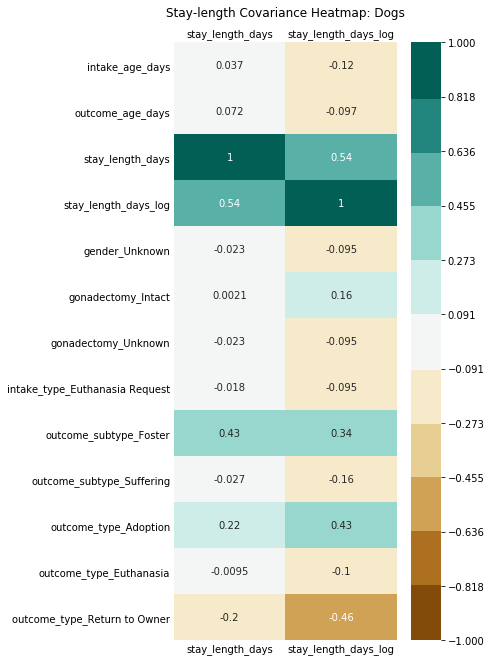

In [10]:
# stay-length covariance
dogs_corr_table = exploration_df[exploration_df.animal_type == "Dog"].corr()
significant_dogs_corr_table = dogs_corr_table.query('(abs(stay_length_days) > (1/11)) | (abs(stay_length_days_log) > (1/11))')

plt.pyplot.figure(figsize = (5,11))
plt.pyplot.title('Stay-length Covariance Heatmap: Dogs', verticalalignment = 'top', position = (0.5, 1.05))
ax = sns.heatmap(significant_dogs_corr_table[['stay_length_days', 'stay_length_days_log']], vmin = -1, center = 0, vmax = 1, annot=True, 
                 cmap = sns.color_palette("BrBG", 11), cbar_kws=dict(ticks=np.arange(-1,1.00001,2/11)))
ax.tick_params(axis = 'x', labeltop = True)
ax.tick_params(length = 0)

The covariance columns indicates that `gender`, `gonadectomy`, `intake_type`, `outcome_type`, `outcome_subtype`, as well as the age variables, may significantly correlate with stay-lengths. 

In the exploration, the `gender_Unknown` did not have enough rows to prove to be a significant category. Yet, all other variables did appeared to potentially associate with stay-lengths. Additionally, from review of the covariance table, it did appear that the variables were indeed independent. 

### Intake-Age

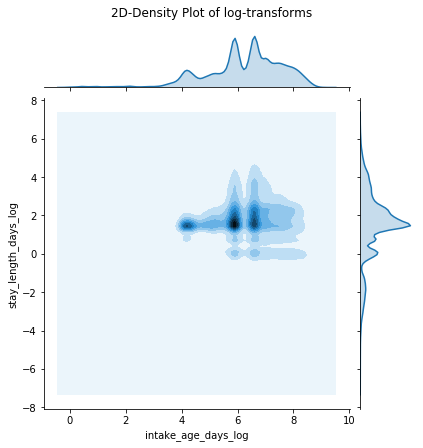

In [11]:
# creating dogs dataframe
dogs_exploration_df = exploration_df[exploration_df.animal_type == "Dog"]

# creating log-transform of the intake age to show linear log-log relationship
dogs_exploration_df['intake_age_days_log'] = dogs_exploration_df.intake_age_days.apply(lambda x: np.log(x + 1))

ax = sns.jointplot(x=dogs_exploration_df.intake_age_days_log, y=dogs_exploration_df.stay_length_days_log, kind = "kde");
plt.pyplot.suptitle('2D-Density Plot of log-transforms', y = 1.03);

In the exploration, it was difficult to visualize a correlation between the intake-age and the log-transform of the stay-length.
Given the vast amount of points (too many for a scatter-plot), I decided to visualize the relationship via a 2D-density plot. Using the 2D-density plot, there does appear to be a linear relationship between the log-transform of the stay-length *and* the log-transform of the intake-age. 

Thus, I would consider testing the intake-age (or log-transform) in a multivariate predictive model. 

### Gonadectomy

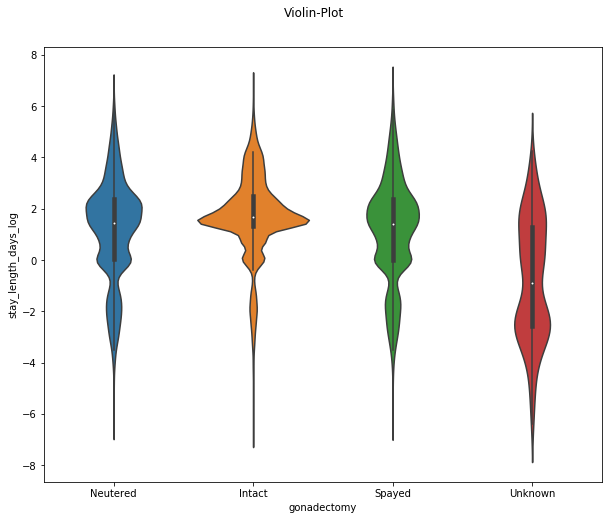

In [12]:
plt.pyplot.figure(figsize = (10,8));
sns.violinplot(data = dogs_exploration_df, x = 'gonadectomy', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

Perhaps unsurprisingly, the "Spayed" and "Neutered" gonadectomy states have similar distributions. The "Intact" gonadectomy does appear to be more densely populated about its mean than the spayed or neutered distributions. Yet, it's unclear visually whether any of the distributions generally have higher values than the others. Though, this might be expected given the correlation between the intact state and the log of the stay-lengths is only 0.16. 

With the "Unknown" state only having 303 observations, I won't explore this subset any further. 

### Intake-Type

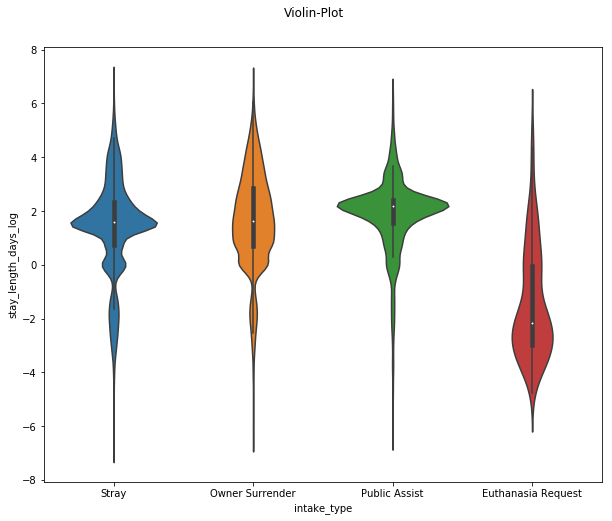

In [13]:
plt.pyplot.figure(figsize = (10,8));
sns.violinplot(data = dogs_exploration_df, x = 'intake_type', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

Each category here either a different mean or shape of distrubtion from the other categories. Thus, it appears the intake-type is a useful categorical variable for predicting the stay-lengths. 

### Outcome-Type

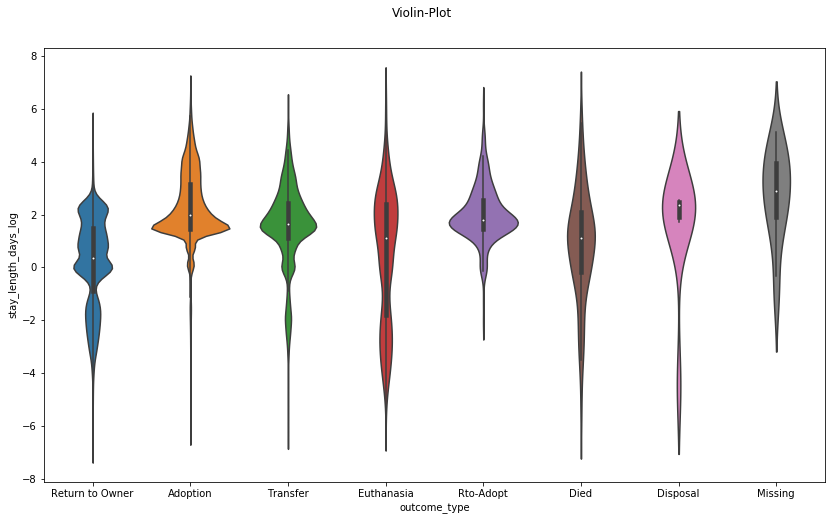

In [14]:
plt.pyplot.figure(figsize = (14,8));
sns.violinplot(data = dogs_exploration_df, x = 'outcome_type', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

The varying means and shapes of distributions indicates that the outcome-type is a useful categorical variable.

### Outcome-Subtype

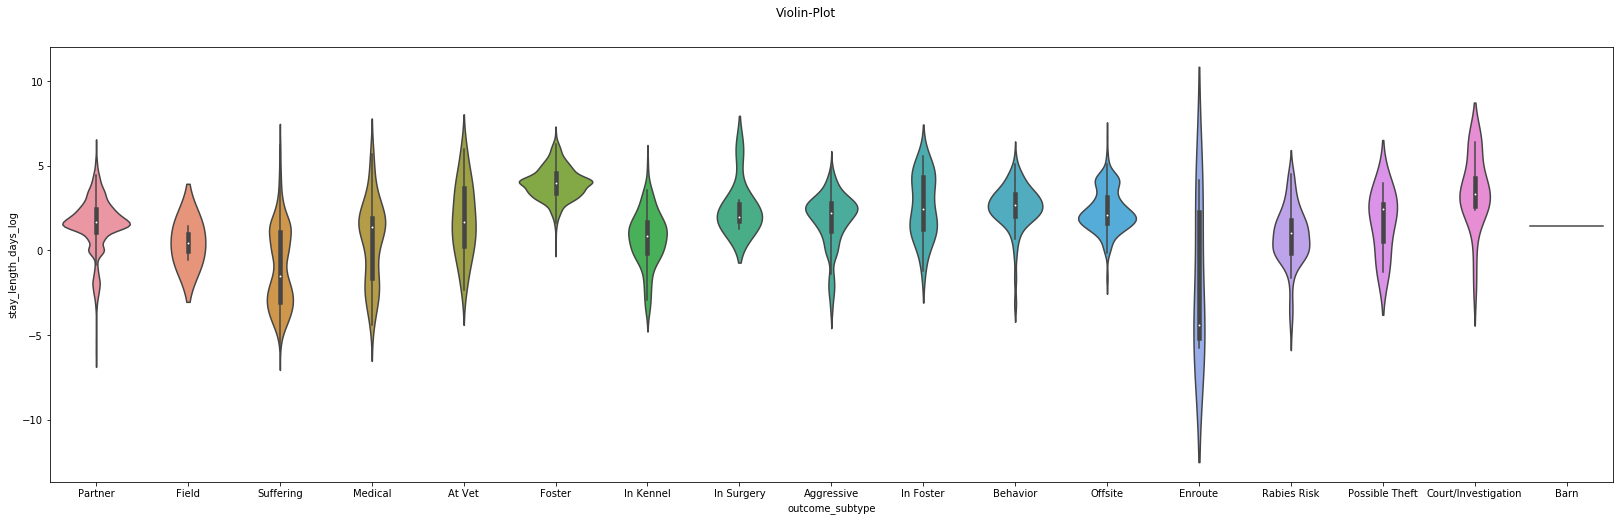

In [15]:
plt.pyplot.figure(figsize = (28,8));
sns.violinplot(data = dogs_exploration_df, x = 'outcome_subtype', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

With a positive correlation of 0.43 between the "Foster" subtype and the log of the stays, it does seem from reviewing the violin plot that the entire Foster distribution has high values than the other subtypes, and thus there does appear to be a significant relationship here.

## Dog Adoptions

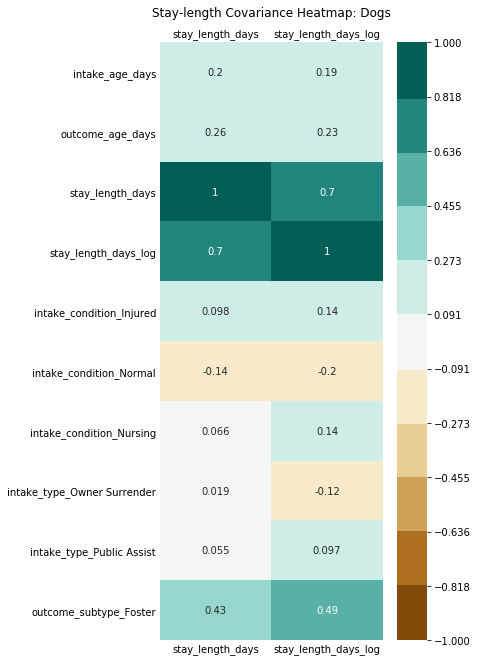

In [16]:
# stay-length covariance
dog_adoptions_corr = exploration_df[(exploration_df.animal_type == "Dog") & (exploration_df.outcome_type == "Adoption")].corr()
significant_dogadoption_corr_table = dog_adoptions_corr.query('(abs(stay_length_days) > (1/11)) | (abs(stay_length_days_log) > (1/11))')

plt.pyplot.figure(figsize = (5,11))
plt.pyplot.title('Stay-length Covariance Heatmap: Dogs', verticalalignment = 'top', position = (0.5, 1.05))
ax = sns.heatmap(significant_dogadoption_corr_table[['stay_length_days', 'stay_length_days_log']], vmin = -1, center = 0, vmax = 1, annot=True, 
                 cmap = sns.color_palette("BrBG", 11), cbar_kws=dict(ticks=np.arange(-1,1.00001,2/11)))
ax.tick_params(axis = 'x', labeltop = True)
ax.tick_params(length = 0)

The stay-length covariance columns indicate that the age variables, intake-condition, intake-type, and the outcome-subtype may correlate with the stay-lengths. 

From the exploration, it was found that almost all dog-adoptions were fosters, and thus the outcome-subtype correlation value was inflated. All other variables appeared to be significant correlates. 

### Intake-Age

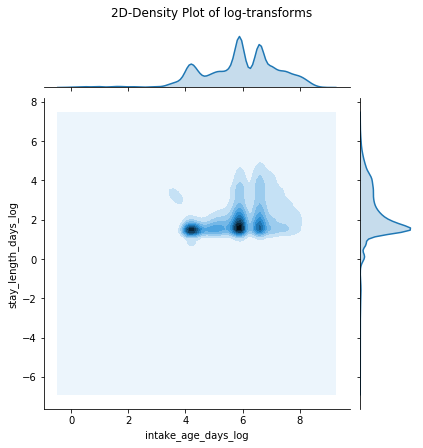

In [17]:
# creating dog-adoptions dataframe
dogadoptions_exploration_df = exploration_df[(exploration_df.animal_type == "Dog") & (exploration_df.outcome_type == "Adoption")]

# creating log-transform of the intake age to show linear log-log relationship
dogadoptions_exploration_df['intake_age_days_log'] = dogadoptions_exploration_df.intake_age_days.apply(lambda x: np.log(x + 1))

ax = sns.jointplot(x=dogadoptions_exploration_df.intake_age_days_log, y=dogadoptions_exploration_df.stay_length_days_log, kind = "kde");
plt.pyplot.suptitle('2D-Density Plot of log-transforms', y = 1.03);

Similarly to the dogs-population visualization, a log-log did appear to produce a linear relationship, so perhaps the log-transform of the intake-age would prove to be a useful feature in a multivariate predictive model.

### Intake-Condition

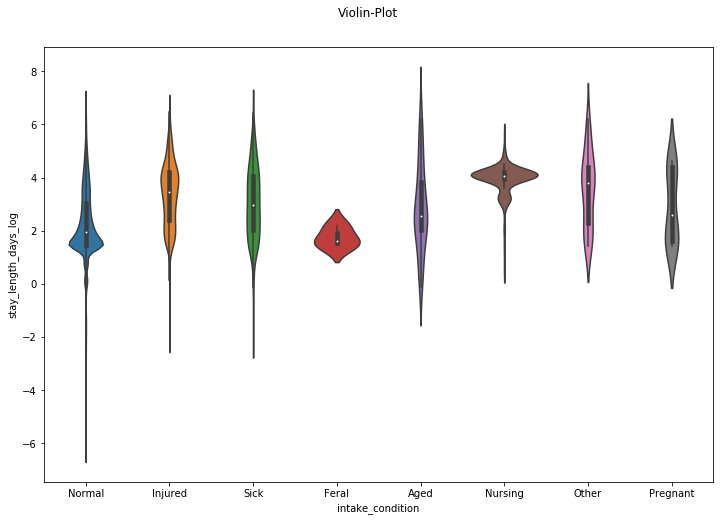

In [18]:
plt.pyplot.figure(figsize = (12,8));
sns.violinplot(data = dogadoptions_exploration_df, x = 'intake_condition', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

The covariance analysis indicated a positive correlation with the injured and nursing conditions, and a negative correlation with the normal condition. This is visible with the violin plots, and is intuitive since if the dog is not "normal", then the center has to provide healthcare in addition to boarding. 

### Intake-Type

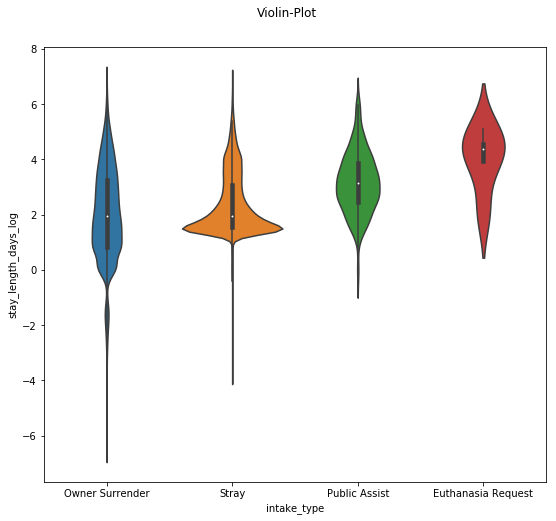

In [19]:
plt.pyplot.figure(figsize = (9,8));
sns.violinplot(data = dogadoptions_exploration_df, x = 'intake_type', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

The "Euthanasia Request" intake-type can reasonably be disregarded as there are only 5 observations.

The other three types do seem to have significantly different shapes of distributions, so the intake-type might be useful categorical variable. 

## Cats

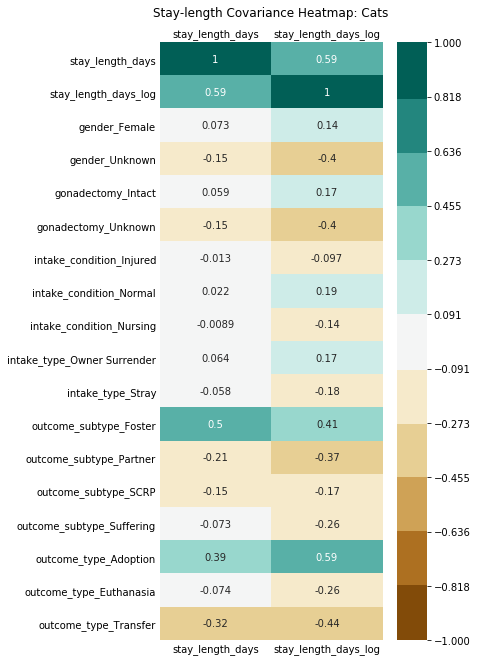

In [20]:
# stay-length covariance
cats_corr_table = exploration_df[exploration_df.animal_type == "Cat"].corr()
significant_cats_corr_table = cats_corr_table.query('(abs(stay_length_days) > (1/11)+0.005) | (abs(stay_length_days_log) > (1/11)+0.005)')

plt.pyplot.figure(figsize = (5,11))
plt.pyplot.title('Stay-length Covariance Heatmap: Cats', verticalalignment = 'top', position = (0.5, 1.05))
ax = sns.heatmap(significant_cats_corr_table[['stay_length_days', 'stay_length_days_log']], vmin = -1, center = 0, vmax = 1, annot=True, 
                 cmap = sns.color_palette("BrBG", 11), cbar_kws=dict(ticks=np.arange(-1,1.00001,2/11)))
ax.tick_params(axis = 'x', labeltop = True)
ax.tick_params(length = 0)

The categories yielding significant correlation values include gender, gonadectomy, intake-condition, intake-type, outcome-type, and outcome-subtype. 

All but gender do appear to hold significant relationships with the stay-length. 

### Gender

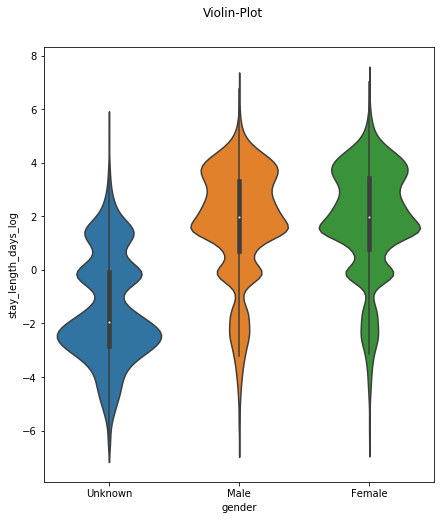

In [21]:
cats_exploration_df = exploration_df[exploration_df.animal_type == "Cat"]

plt.pyplot.figure(figsize = (7,8));
sns.violinplot(data = cats_exploration_df, x = 'gender', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

Note that the male and female distributions are essentially identical. 

Interestingly enough, there are 3,076 Unknown values in the cats population. Yet, given that there are 16,589 female values and 16,065 male values, any statistical analysis might exclude those rows. 

Therefore, I don't believe that gender is a significant category concerning the stay-lengths. 

### Gonadectomy

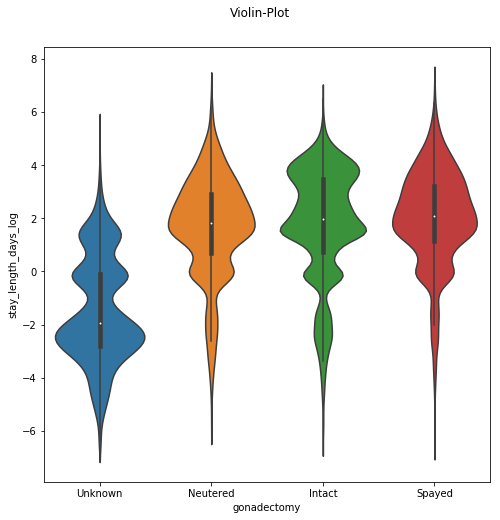

In [22]:
plt.pyplot.figure(figsize = (8,8));
sns.violinplot(data = cats_exploration_df, x = 'gonadectomy', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

Similarly to gender, the unknown values appear to have the most drastically differing distribution. 

Yet here, the neutered and spayed distribution look almost identical, while the intact distribution has an extra peak amongst the longer stays. Thus, it does appear that gonactomy would be a variable of interest. Perhaps the gonadectomy categorical variable should be converted to an "Intact?" binary variable. 

### Intake-Condition

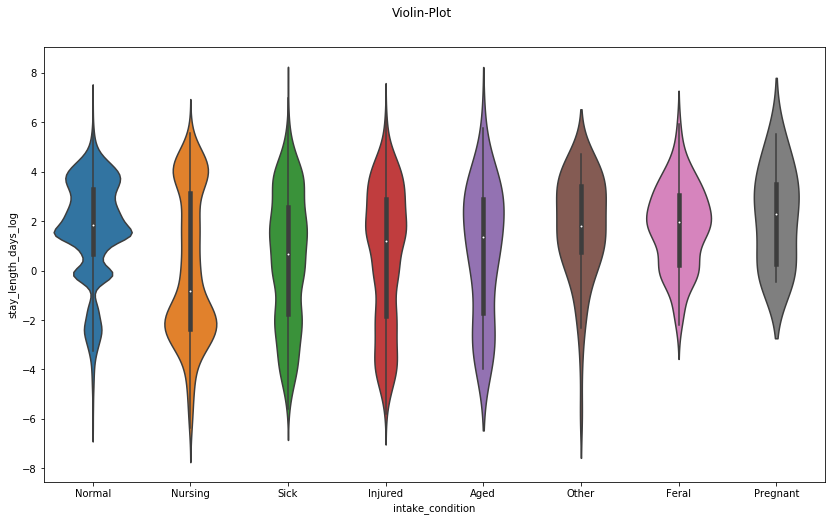

In [23]:
plt.pyplot.figure(figsize = (14,8));
sns.violinplot(data = cats_exploration_df, x = 'intake_condition', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

The distribution for normal condtions does appear to a significantly different shape than the other conditions, thus it does appear to be a significant category regarding the stay-lengths. 

### Intake-Type

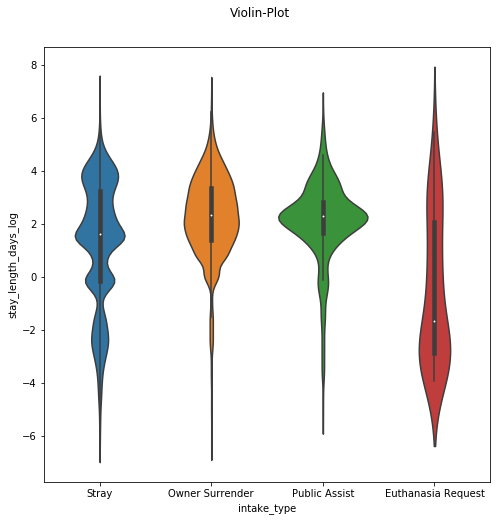

In [24]:
plt.pyplot.figure(figsize = (8,8));
sns.violinplot(data = cats_exploration_df, x = 'intake_type', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

Each of the categories have different distributions, thus the intake-type looks to be a significant variable. 

### Outcome-Type

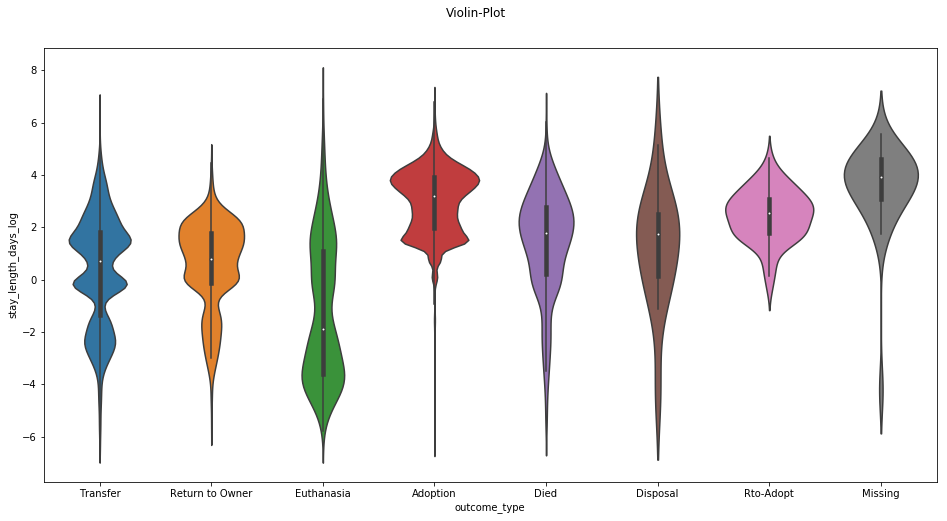

In [25]:
plt.pyplot.figure(figsize = (16,8));
sns.violinplot(data = cats_exploration_df, x = 'outcome_type', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

The distributions do generally appears to vary in stay-length and in shape. As seen with the dog population, the adoptions seem to account for the longer stay-lengths. 

### Outcome-Subtype

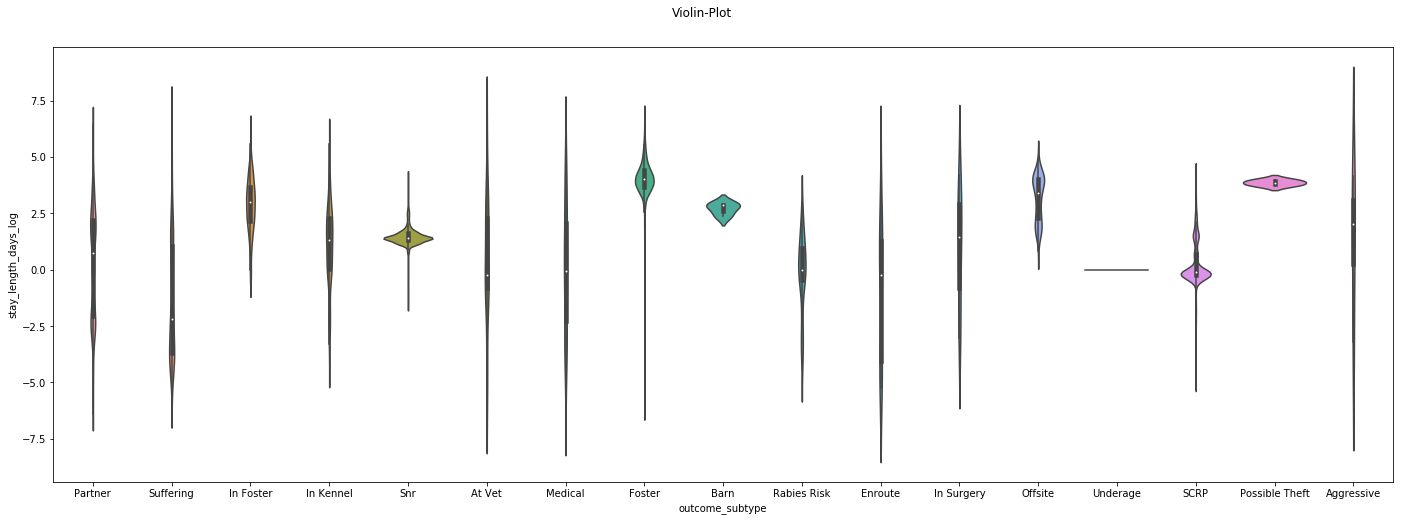

In [26]:
plt.pyplot.figure(figsize = (24,8));
sns.violinplot(data = cats_exploration_df, x = 'outcome_subtype', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

The categories with a minimal number of observations look like needles in the plot, but the categories with a significant number of observations are perceptible and they do appear to vary significantly in stay-lengths, thus this does appear to be a useful categorical variable. 

## Cat Adoptions

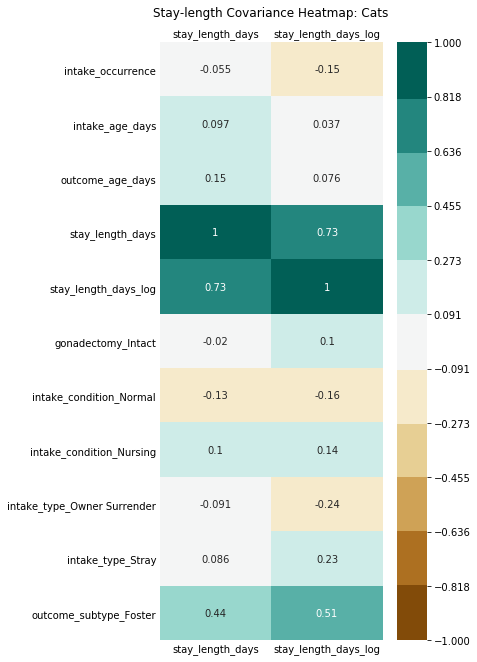

In [27]:
# stay-length covariance
cat_adoptions_corr = exploration_df[(exploration_df.animal_type == "Cat") & (exploration_df.outcome_type == "Adoption")].corr()
significant_catadoption_corr_table = cat_adoptions_corr.query('(abs(stay_length_days) > (1/11)) | (abs(stay_length_days_log) > (1/11))')

plt.pyplot.figure(figsize = (5,11))
plt.pyplot.title('Stay-length Covariance Heatmap: Cats', verticalalignment = 'top', position = (0.5, 1.05))
ax = sns.heatmap(significant_catadoption_corr_table[['stay_length_days', 'stay_length_days_log']], vmin = -1, center = 0, vmax = 1, annot=True, 
                 cmap = sns.color_palette("BrBG", 11), cbar_kws=dict(ticks=np.arange(-1,1.00001,2/11)))
ax.tick_params(axis = 'x', labeltop = True)
ax.tick_params(length = 0)

This time, the intake occurrence produced a significant (inverse) correlation with the log of the stay-length, perhaps indicating that cats are more likely to get adopted faster on subsequent visits. This will need to explored visually. 

Additionally, the age of the cat, gonadectomy, intake-condition, intake-type, and outcome-subtype produced significant correlations. In the exploration, there was visual evidence to support the presence of a relationship for each variable, except for the outcome-subtype. Nearly all adoptions are fosters, thus it's not a useful category. 

### Intake-Occurrence

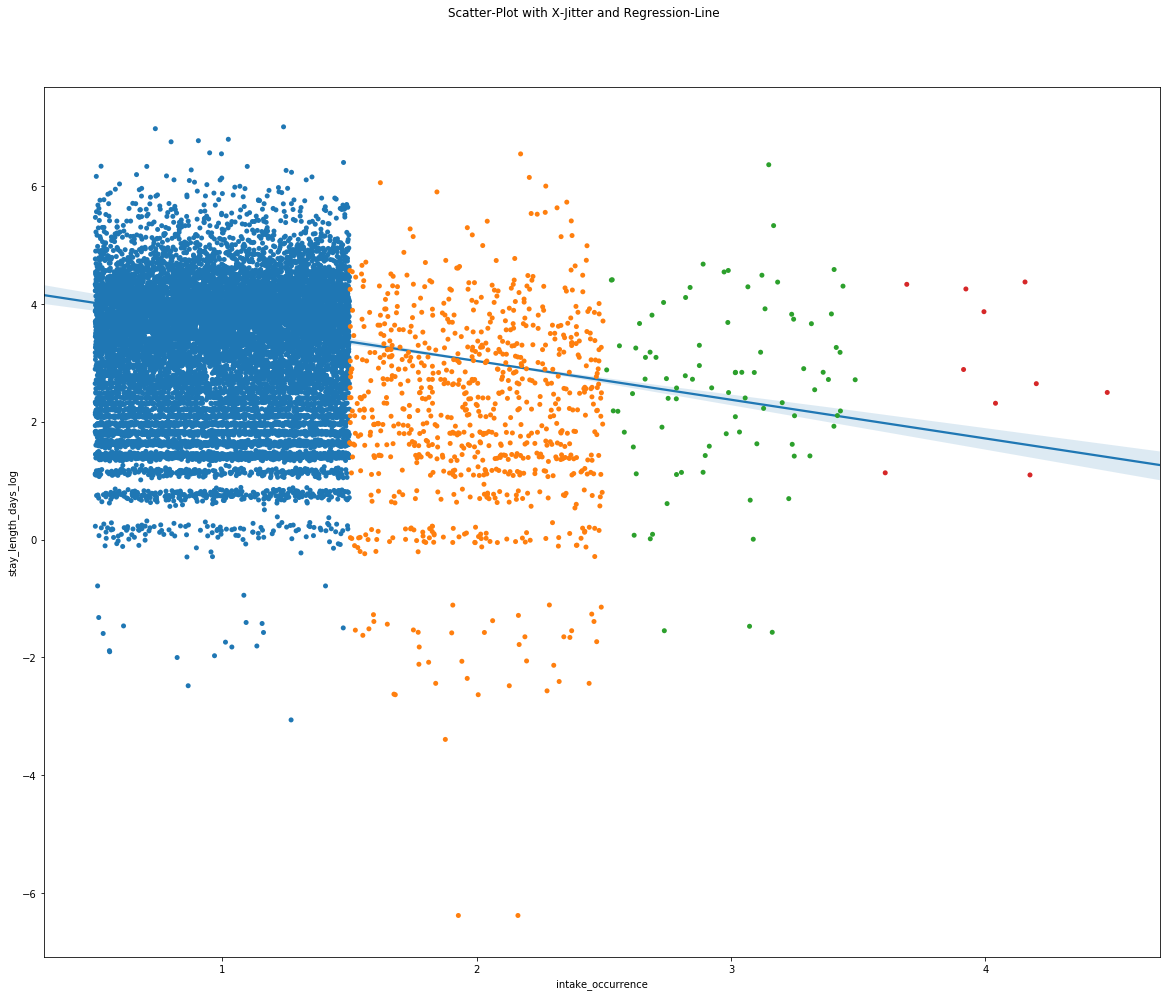

In [28]:
catadoptions_exploration_df = exploration_df[(exploration_df.animal_type == "Cat") & (exploration_df.outcome_type == "Adoption")]

plt.pyplot.figure(figsize = (20,16))
sns.stripplot(x=catadoptions_exploration_df.intake_occurrence, y=catadoptions_exploration_df.stay_length_days_log, jitter = 0.5);
sns.regplot(x=catadoptions_exploration_df.intake_occurrence, y=catadoptions_exploration_df.stay_length_days_log, scatter = False);
plt.pyplot.suptitle('Scatter-Plot with X-Jitter and Regression-Line', y = 0.95);

The jitter seems to effectively capture the prevalence of 1st occurrences over subsequent occurrence. Given, the scarcity of subsequent occurrences, I'm not convinced that there is indeed a significant relationship here, yet it does indeed seem that the 2nd occurrence stay-lengths are somewhat shorter than the 1st stays. 

### Intake-Age

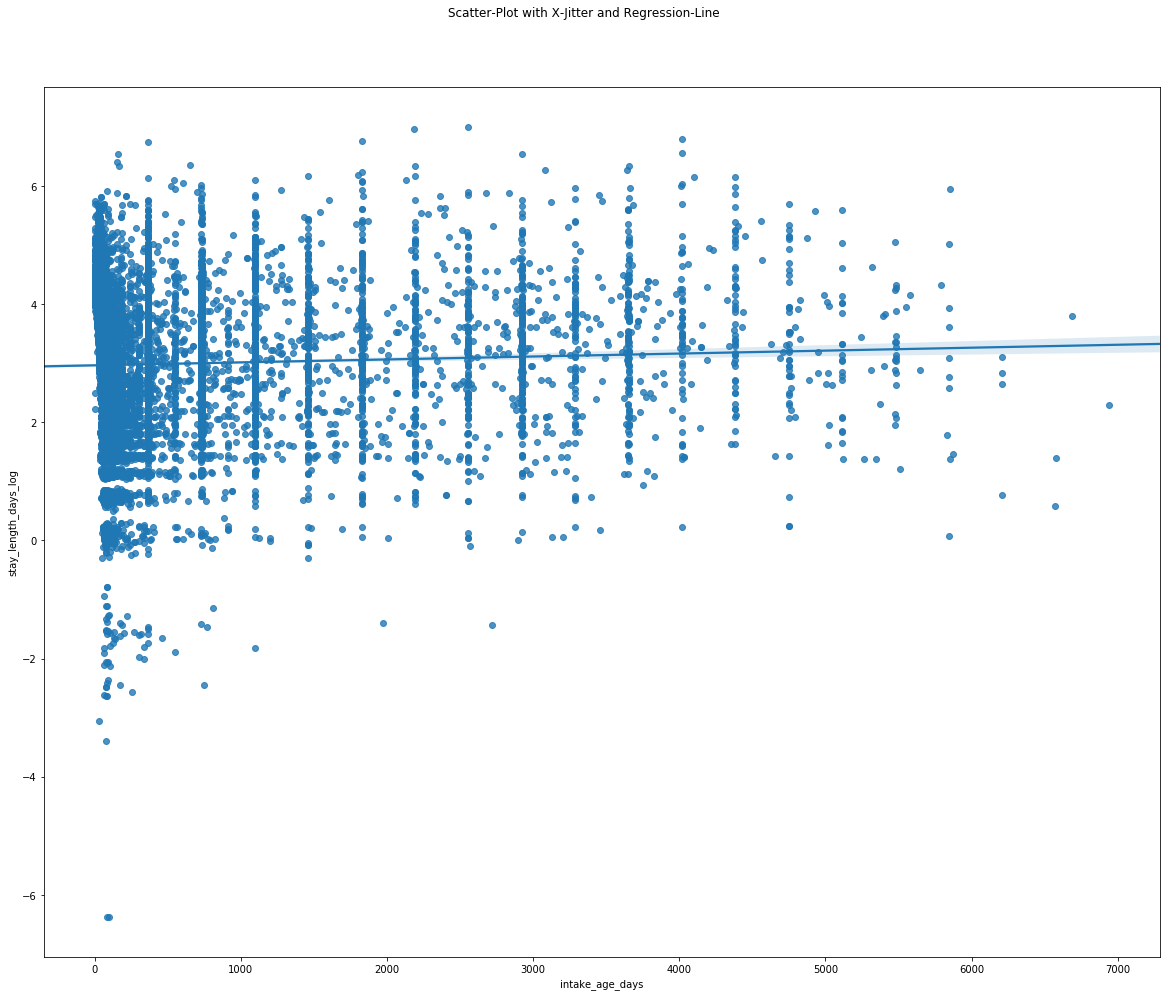

In [29]:
plt.pyplot.figure(figsize = (20,16))
sns.regplot(x=catadoptions_exploration_df.intake_age_days, y=catadoptions_exploration_df.stay_length_days_log);
plt.pyplot.suptitle('Scatter-Plot with X-Jitter and Regression-Line', y = 0.95);

Again, maybe the correlation indicates a relationship, yet it's difficult to visualize given the majority of the observations are towards the left end of the graphic. 

### Gonadectomy

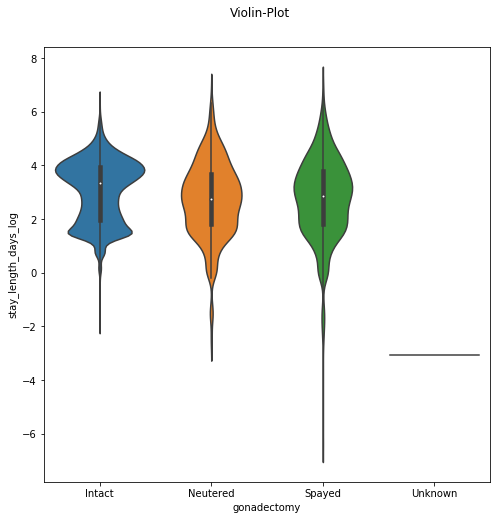

In [30]:
plt.pyplot.figure(figsize = (8,8));
sns.violinplot(data = catadoptions_exploration_df, x = 'gonadectomy', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

As seen with the other subpopulations, the spayed distribution is very similar to the neutered distribution, and both are significantly different from the intact distribution. So perhaps in a statistical model, the variable should be adjusted to a binary variable as to whether the animal is in intact or not (independent of gender). 

### Intake-Condition

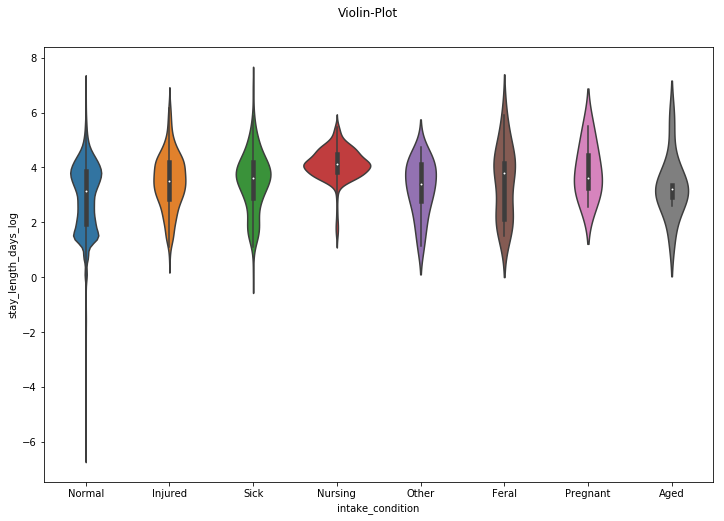

In [31]:
plt.pyplot.figure(figsize = (12,8));
sns.violinplot(data = catadoptions_exploration_df, x = 'intake_condition', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

The shapes of the distributions and the stay-length values do appear to vary amongst the intake-conditions. Also, it does appear the normal intake-conditions generally appear to be associated with shorter stay-lengths than the other conditions. 

### Intake-Type

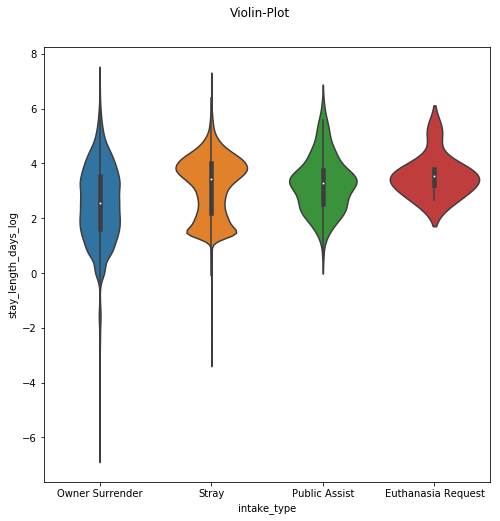

In [32]:
plt.pyplot.figure(figsize = (8,8));
sns.violinplot(data = catadoptions_exploration_df, x = 'intake_type', y = 'stay_length_days_log');
plt.pyplot.suptitle('Violin-Plot', y = 0.95);

This does appear to be a significant variable given the different categories appear to have varying distributions and stay-lengths. 

## Recap

The exploration of the entire population did yield significant correlations pertaining to the animal-type and the outcome-type. This is an intuitive finding, as dog-adoptions would seem to be an inherently different type of population then a rabid-bat euthanasia-request (a common occurrence for the Austin area). 

Exploring the various subpopulations didn't yield strong correlations, but did seem to reveal some subtle relationships that could probably be explored via multivariate statistical analysis. 

Below are the list of populations and their respective significant correlates for stay-lengths: 

**Whole Population**
* animal-type
* intake-condition 
* intake-type
* outcome-type

**Dogs**
* intake-age
* gonadectomy
* intake-type
* outcome-type
* outcome-subtype

...

**Dog Adoptions**
* intake-age
* intake-condition
* intake-type

**Cats**
* gonadectomy
* intake-condition
* intake-type
* outcome-type
* outcome-subtype

**Cat Adoptions**
* intake-occurrence
* intake-age
* gonadectomy
* intake-condition
* intake-type